# Machine Learning - Linear Regression Example - Yiannis Pitsillides

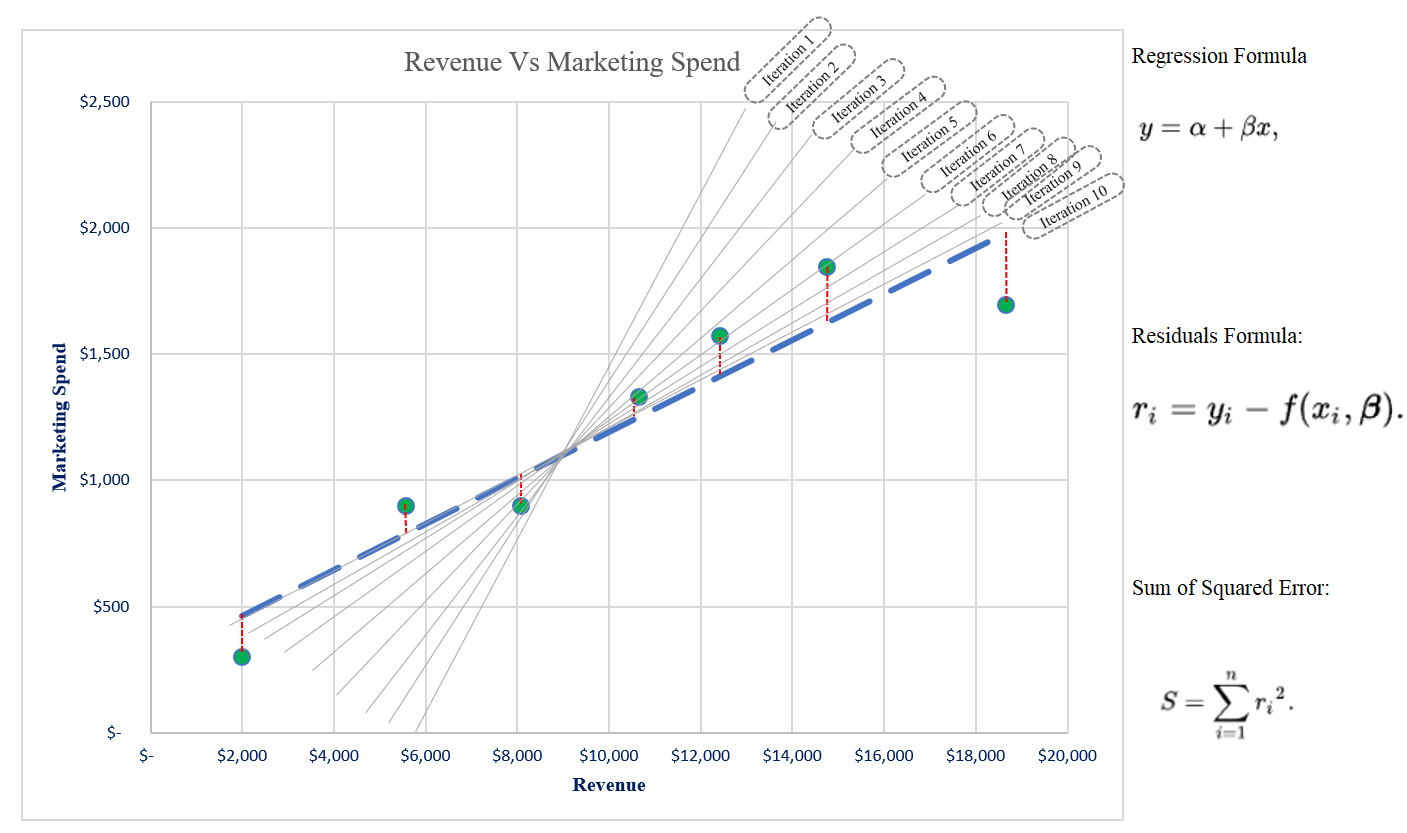

In [28]:
# import os
# from IPython.display import Image
# Image(filename = "Regression Example.png", width=900, height=900)

## 1. What is Machine Learning (ML) in a nutshell
- “Machine learning is the science (and art) of programming computers so they can learn from data” by Aurélien Géron book (Hands-On Machine Learning with Scikit-Learn and TensorFlow)
- ML uses statistical models and algorithms to perform tasks like predictions & classifications without explicit instructions
- ML is a subset of Artificial Intelligence

## 2. The Machine Learning Process

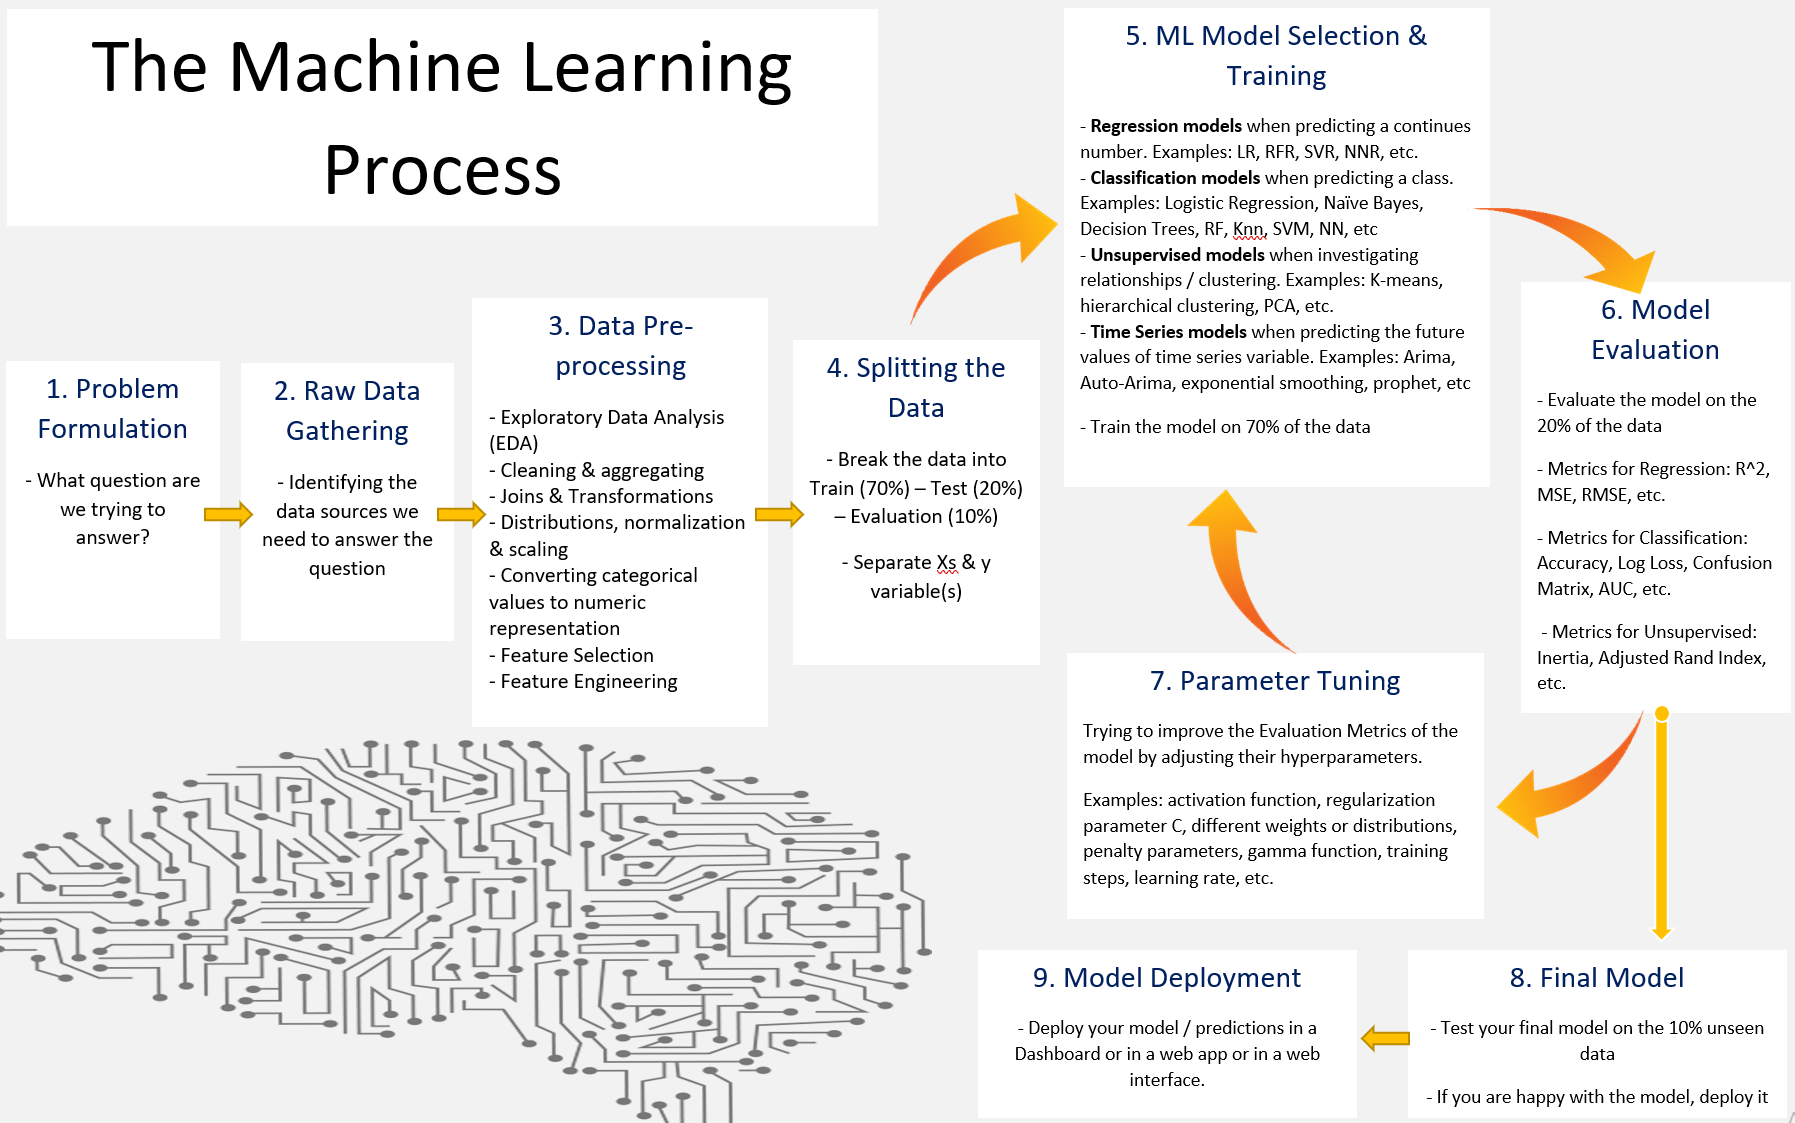

In [29]:
# Image(filename = "ML Process.png", width=900, height=900)

## 3. Problem Formulation

- We want to understnad the factors that affect the car prices
- We want to be able to predict car prices based on our data/variables

In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import sys
# !conda list Check the packages installed

## 4. Loading the Raw Data

In [2]:
# Loading the data
raw_data = pd.read_csv('CarPrice_Assignment.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

#raw data: https://www.kaggle.com/datasets/shaistashaikh/carprice-assignment

(205, 26)


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

## 5.3. Investigating the numeric values with scatterplots

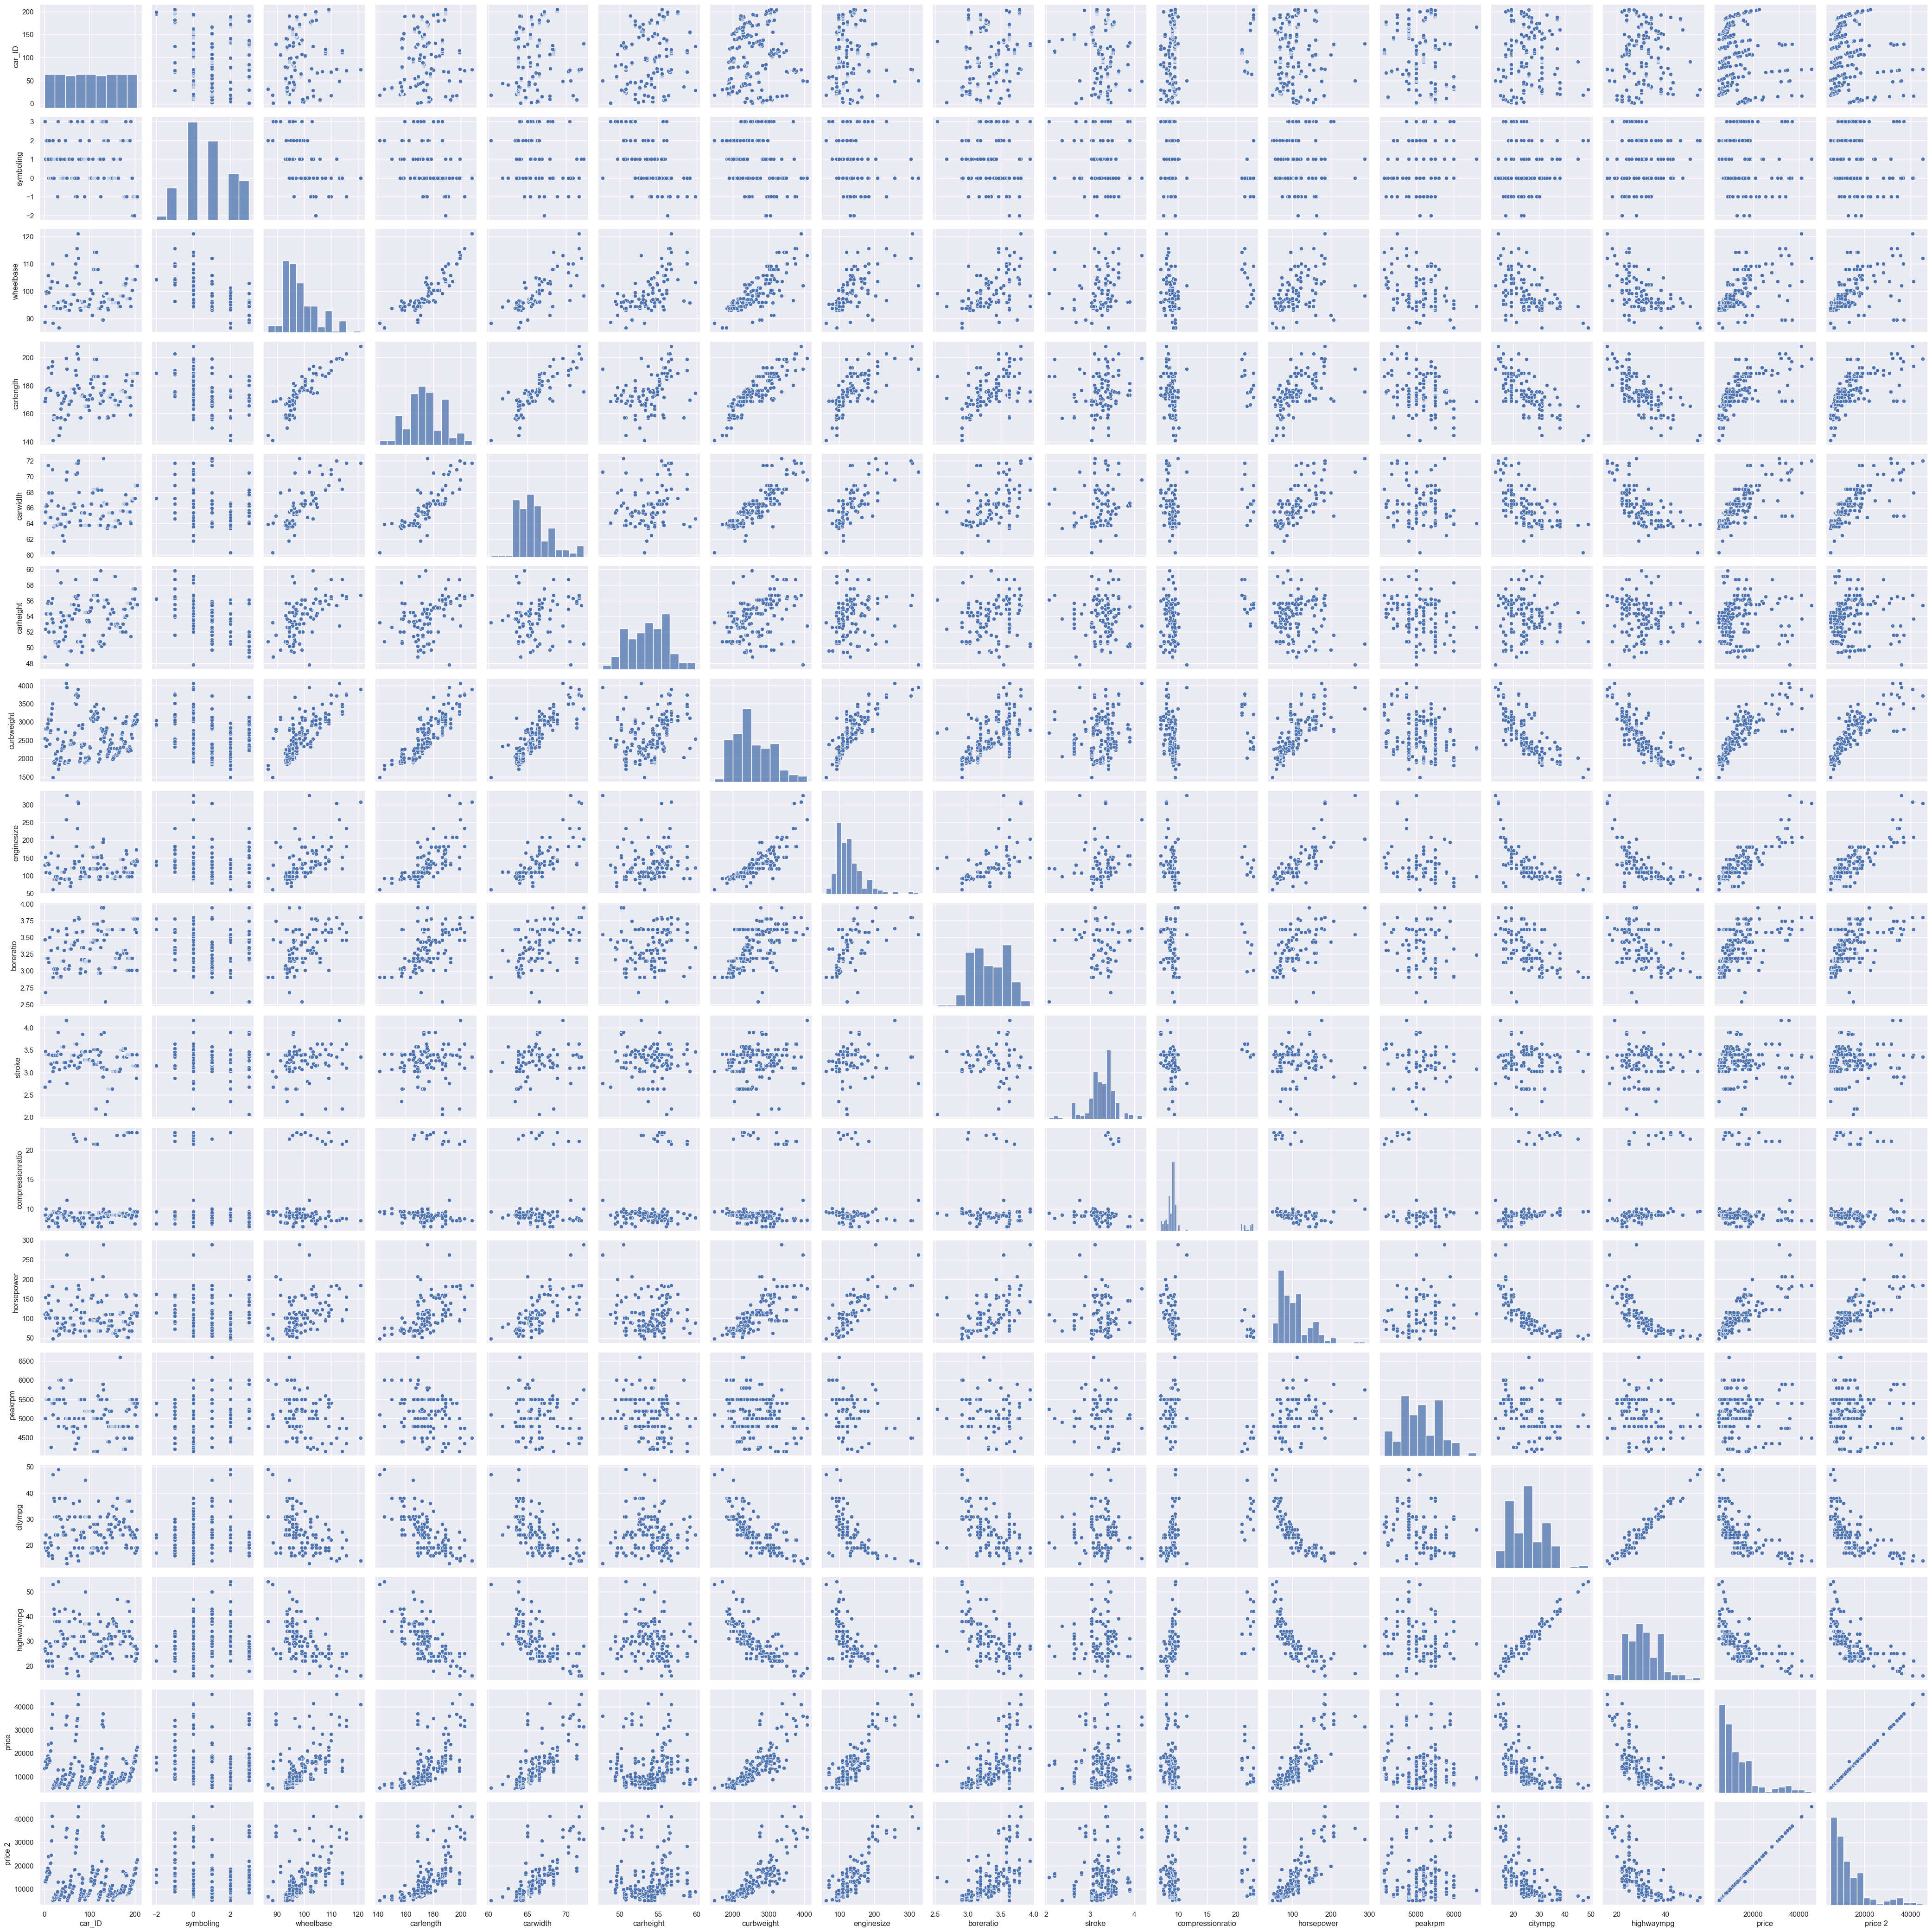

In [5]:
# Example 1 - Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data)

# Notes: Do not run this on a big dataset. Filter the columns first

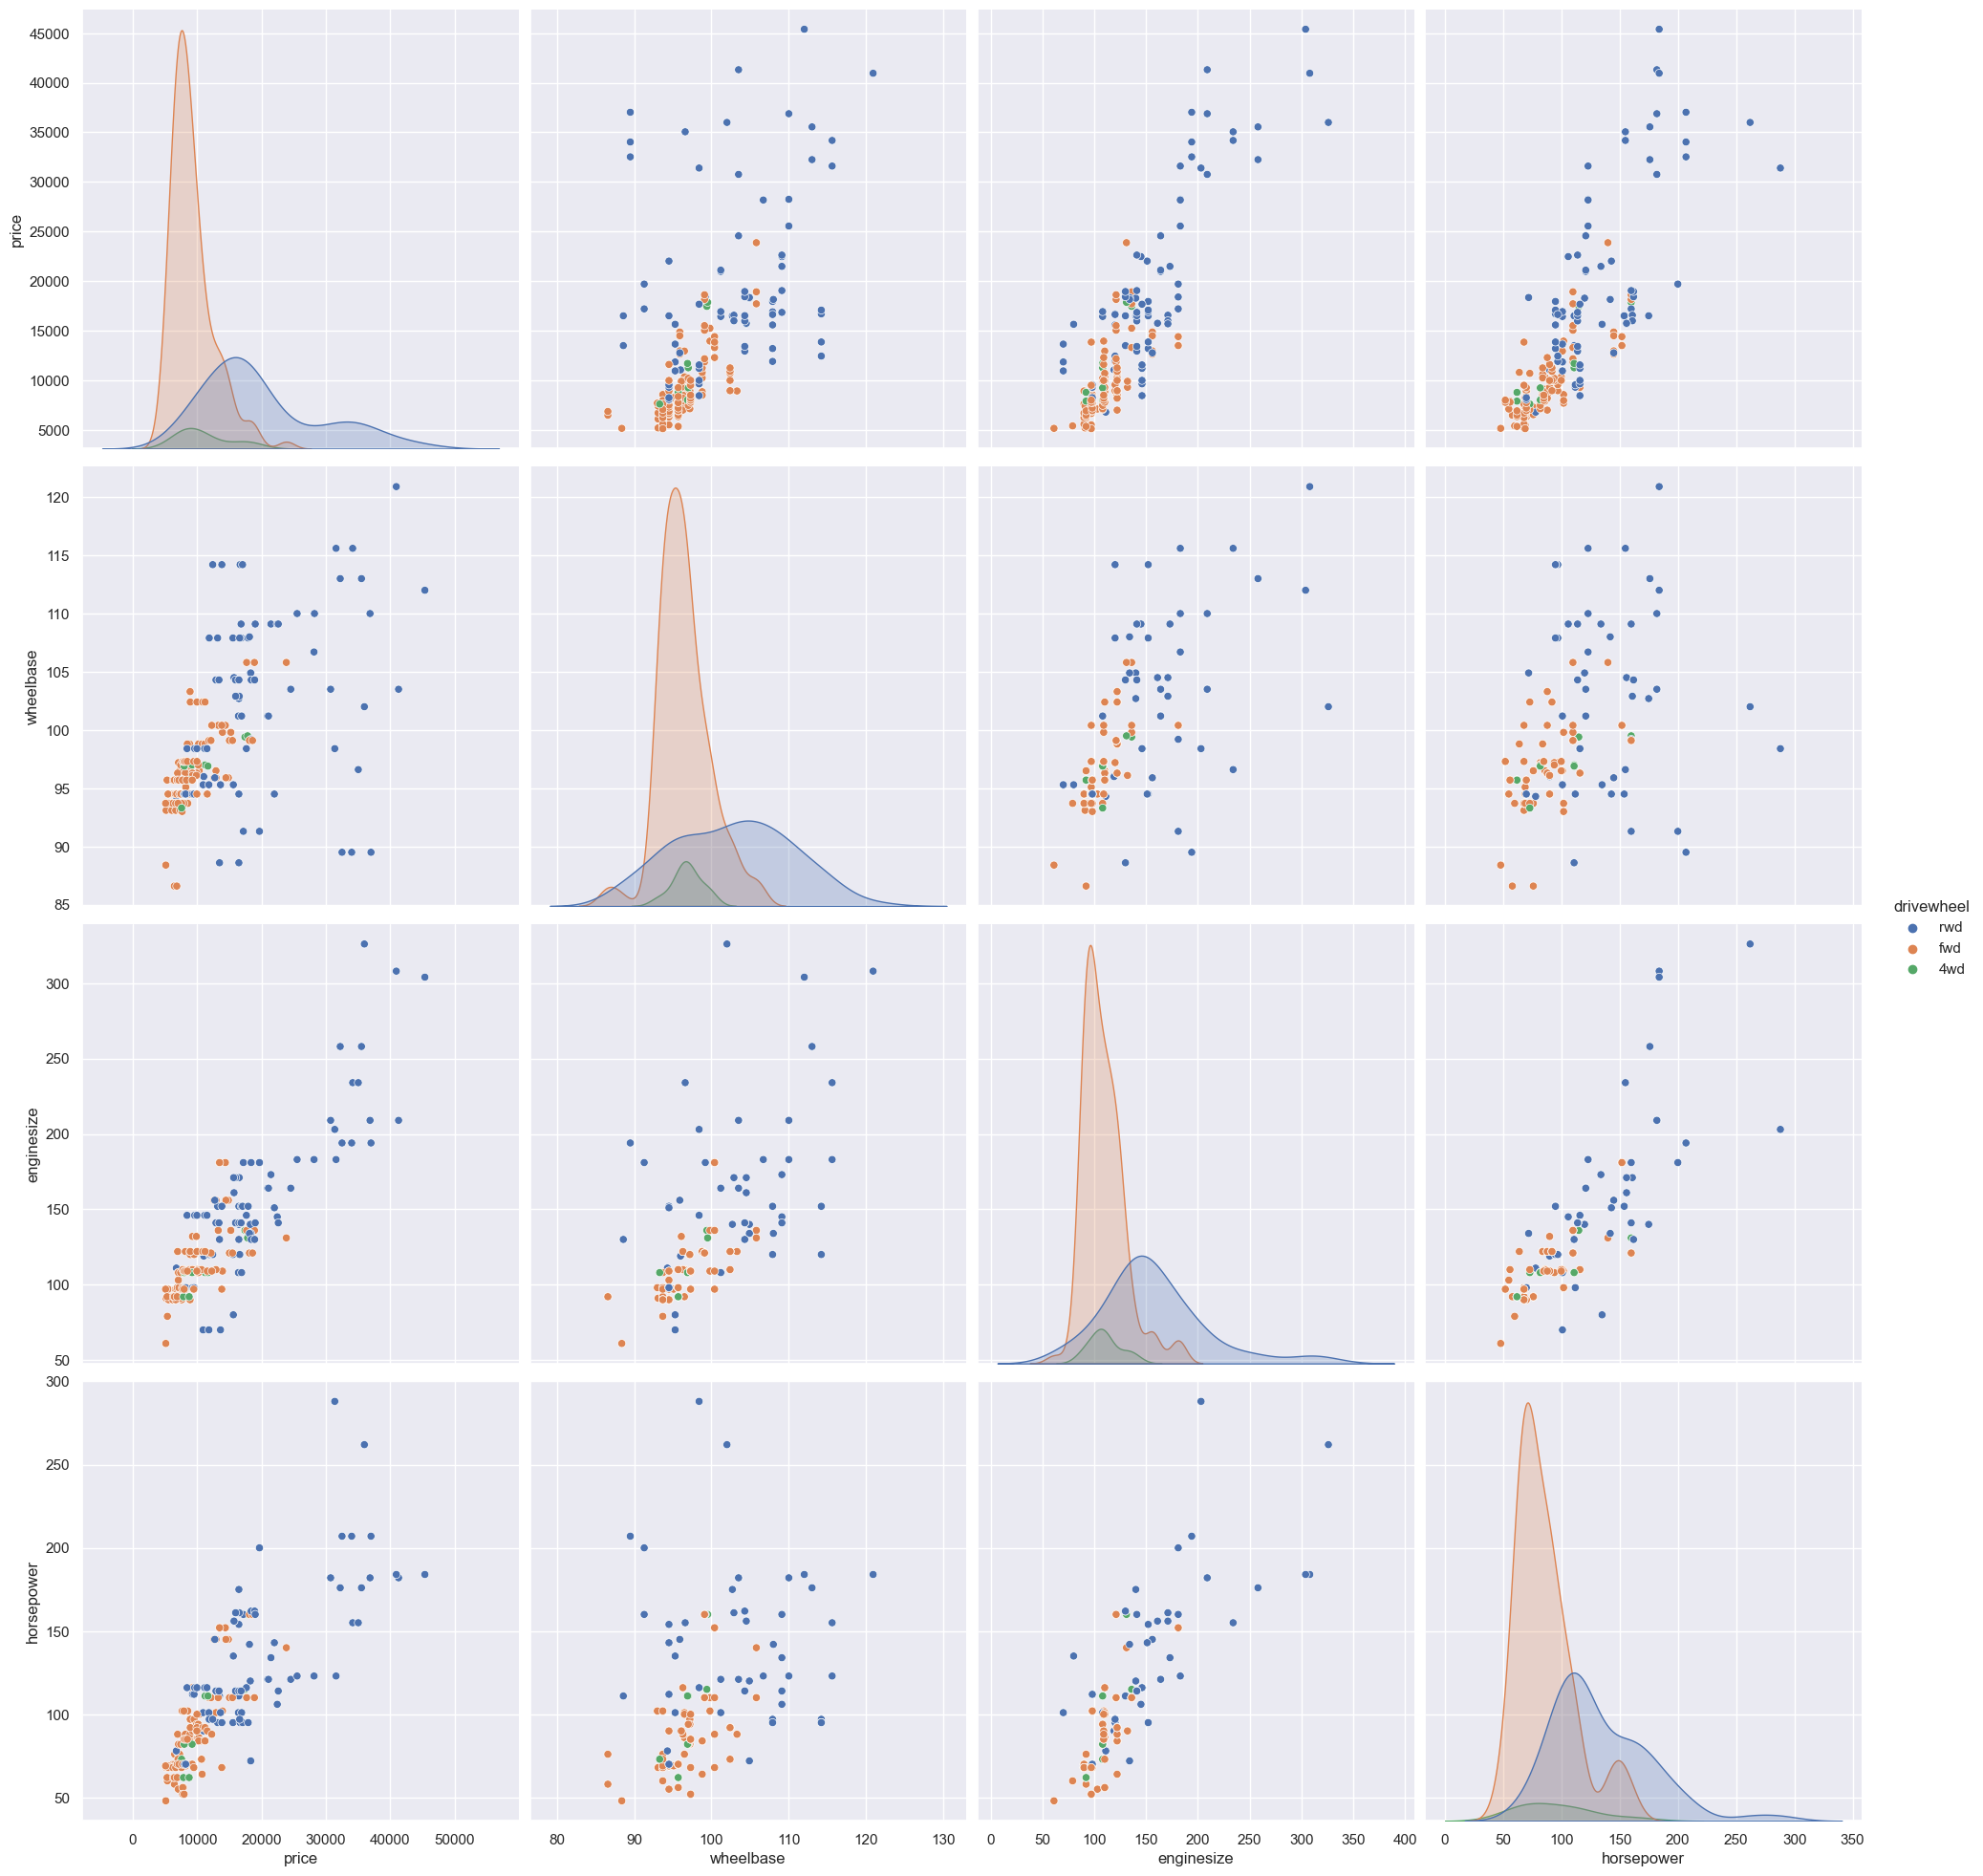

In [8]:
# Example 2 - Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5)

## 5.4. Investigating the categorical data

carbody         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback  10376.652386
3        sedan  14344.270833
4        wagon  12371.960000

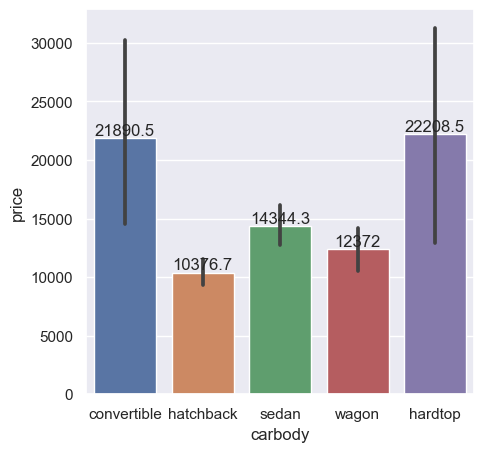

In [9]:
# Example 5 - Average price by carbody

ax = sns.barplot(x="carbody", y="price", data=raw_data)
ax.bar_label(ax.containers[0])

# Notes: 
# 1 - the lines signify the confidence interval
# 2 - Takes mean by default

raw_data[['carbody', 'price']].groupby('carbody', as_index = False).agg({'price':'mean'})

In [ ]:
# pd.get_dummies

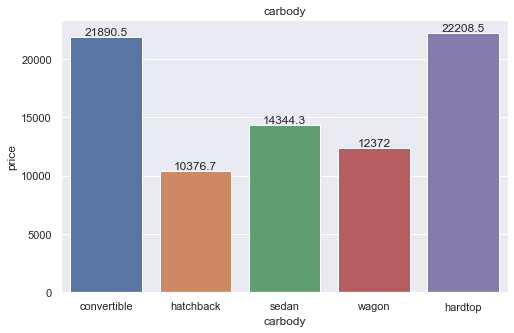

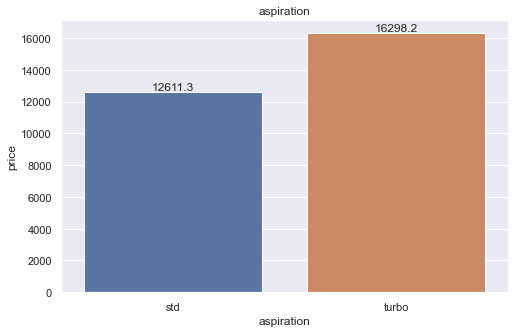

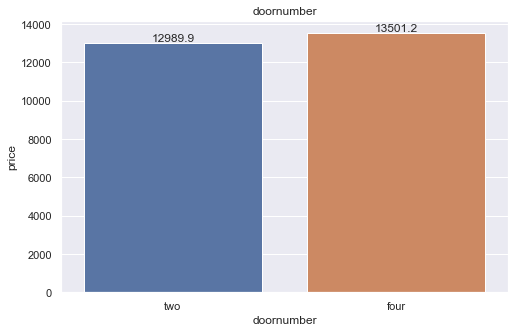

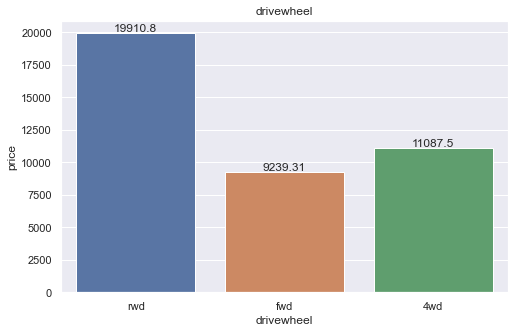

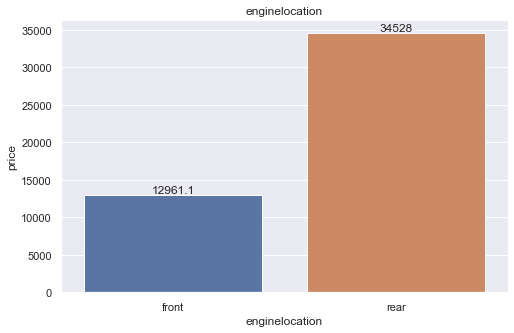

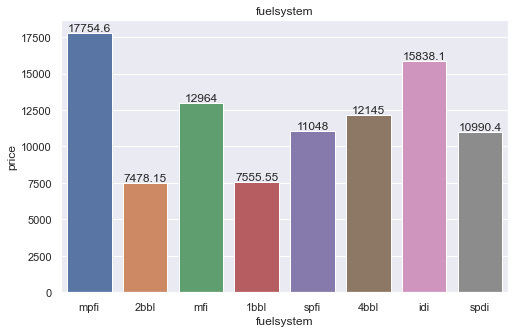

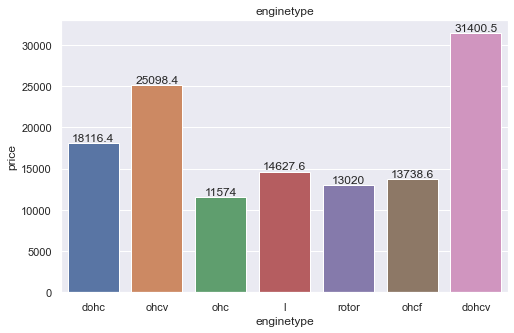

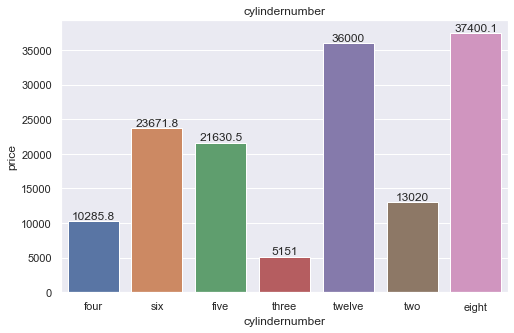

In [41]:
# Example 6 - Total price by carbody for multiple categories

categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    
    ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

## 5.5. Investigating the distributions with distplots

C:\Users\serda\AppData\Local\Temp\ipykernel_9728\2941786292.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


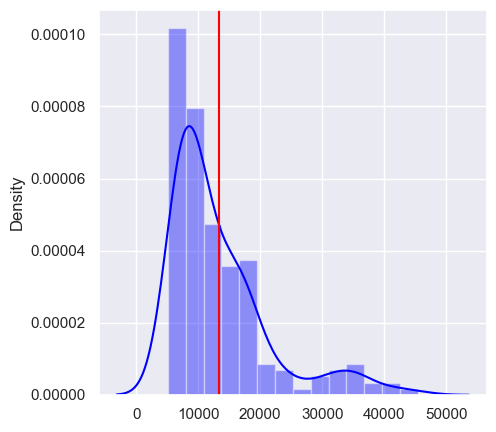

In [4]:
# Example 7 - Investigating the distribution of price, adding the mean

x = raw_data['price'].values

sns.distplot(x, color = 'blue');

# Calculating the mean
mean = raw_data['price'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

In [5]:
raw_data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

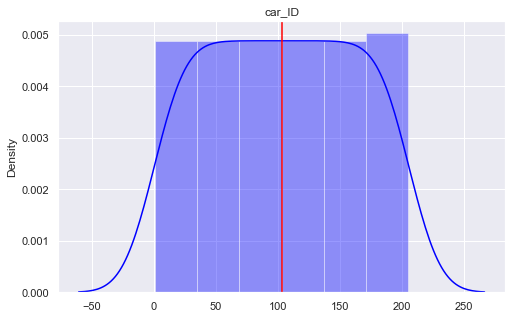

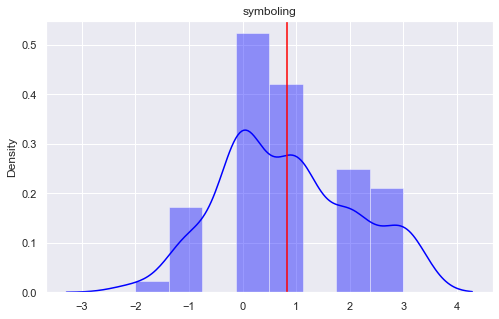

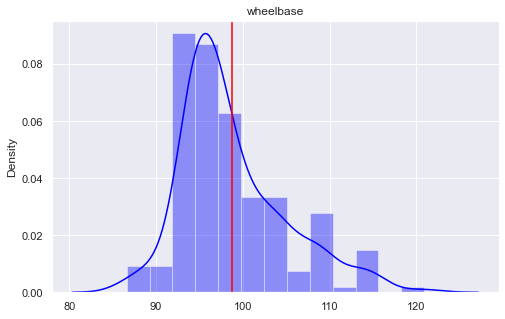

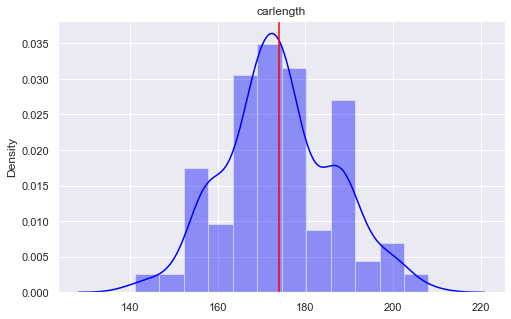

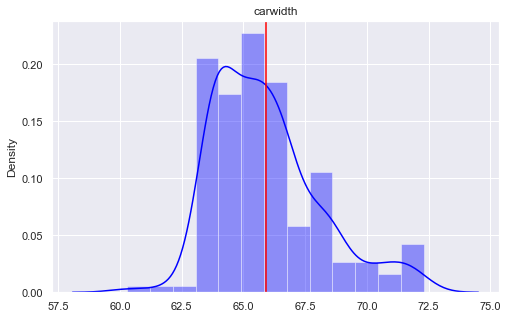

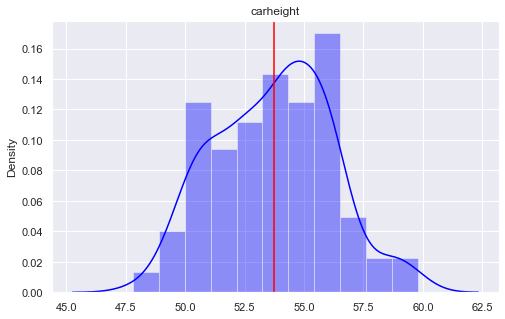

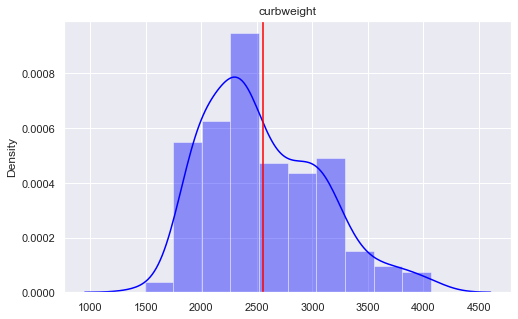

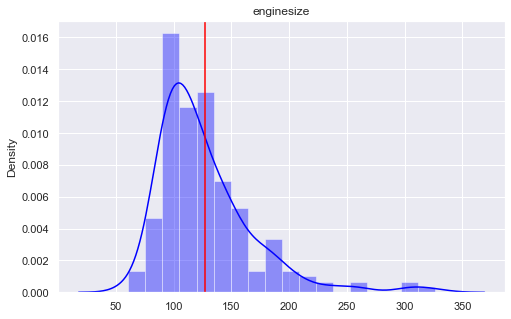

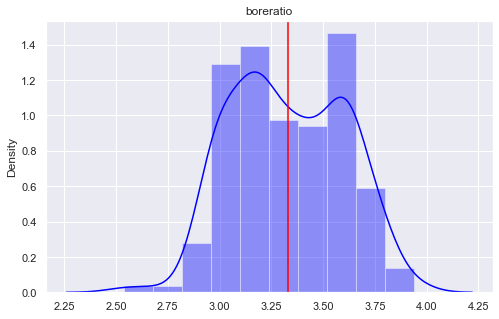

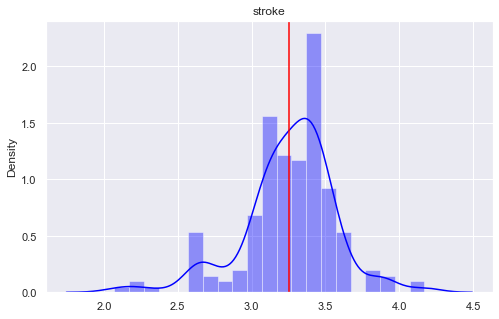

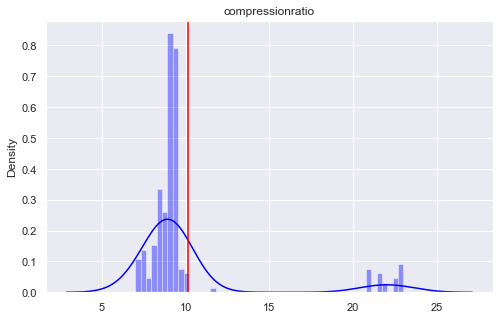

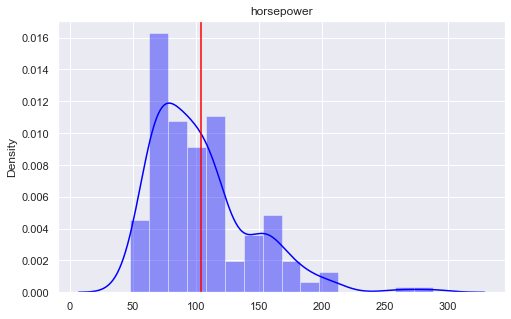

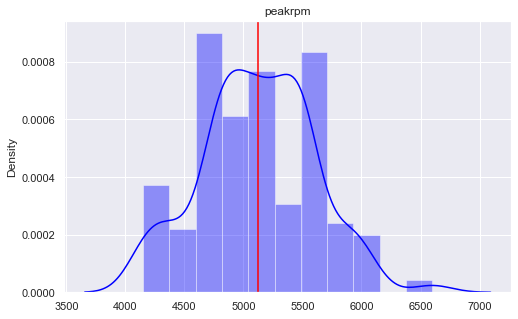

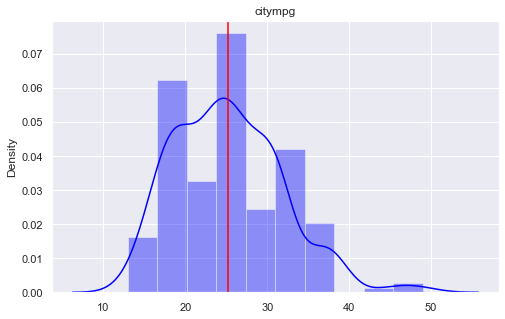

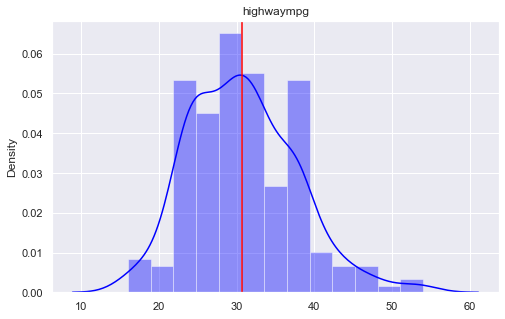

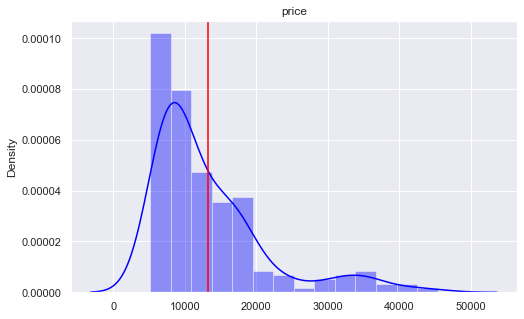

In [43]:
# Example 8 - Investigating the distribution of all fields, adding the mean

# identifying all numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = raw_data.select_dtypes(include=numerics).columns

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in n_variables:
    x = raw_data[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = raw_data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

In [ ]:
# right-skewed

#skewness

In [44]:
n_variables

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## 5.6. Investigating the distribution and outliers with Box plots

The meadian is:  10295.0


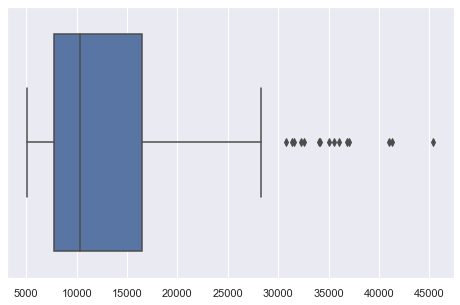

In [45]:
# Example 9 - Investigating the distribution of Price

x = raw_data['price'].values
ax = sns.boxplot(x)

print('The median is: ', raw_data['price'].median())

# Notes:
# The line signifies the median
# The box in the middle show the beginning of Q1 (25th percentile) and the end of the Q3 (75th percentile)
# The whiskers (left - right) show the minimum quartile and maximum quartile
# The dots on the right are "outliers"

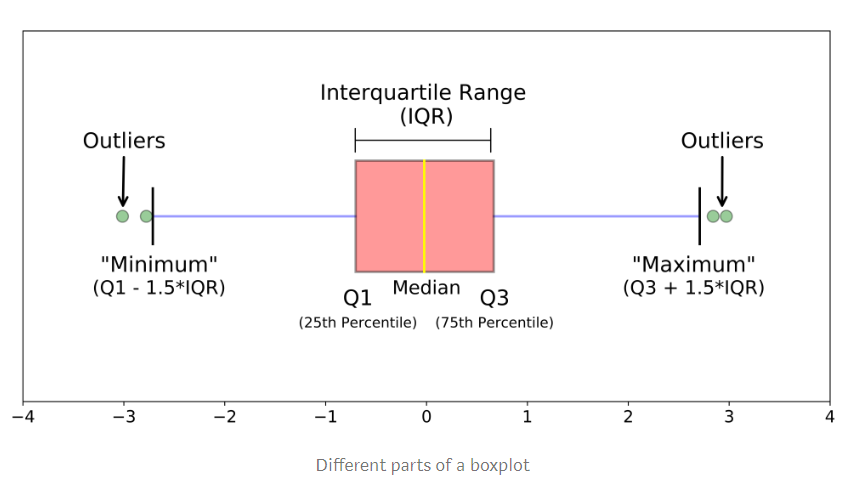

In [46]:
# More Details


#Image(filename = "Seaborn boxplot.png", width=900, height=900)

# More details here: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
# Credits: Michael Galarnyk

The meadian is:  103.0


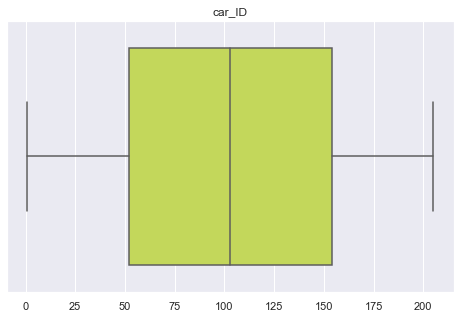

The meadian is:  1.0


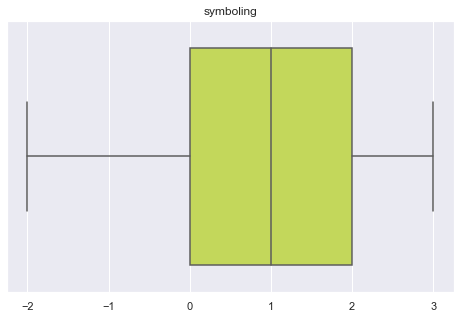

The meadian is:  97.0


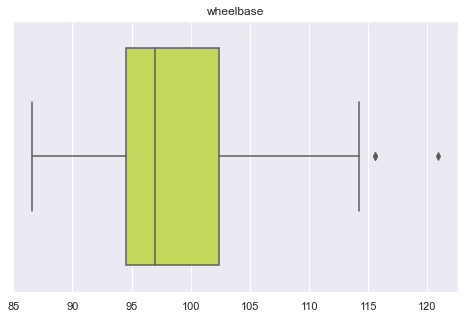

The meadian is:  173.2


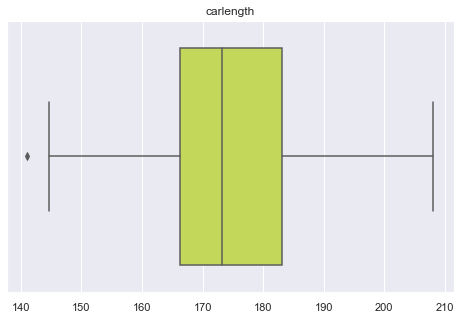

The meadian is:  65.5


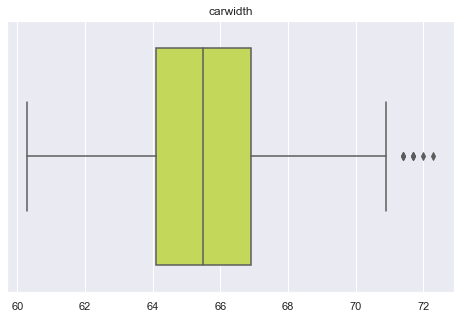

The meadian is:  54.1


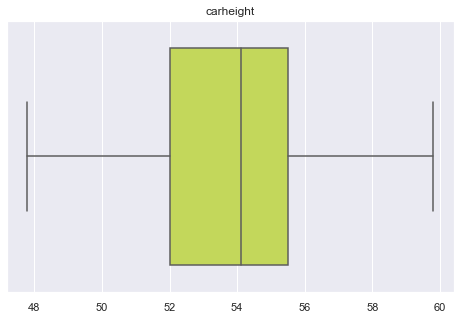

The meadian is:  2414.0


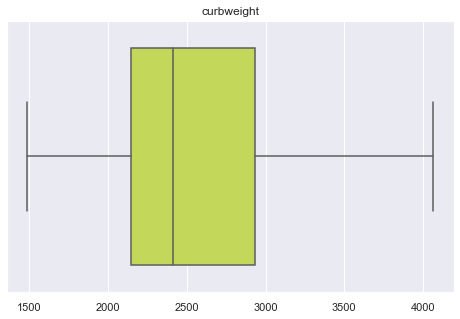

The meadian is:  120.0


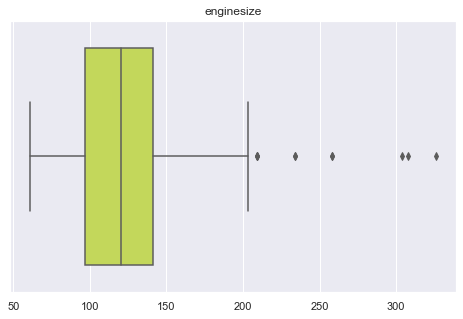

The meadian is:  3.31


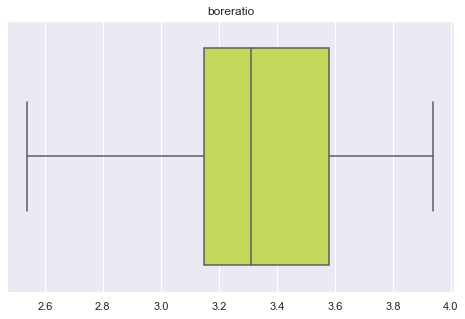

The meadian is:  3.29


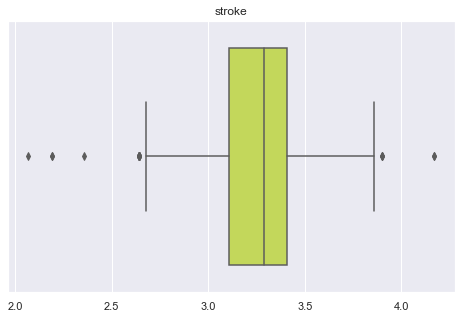

The meadian is:  9.0


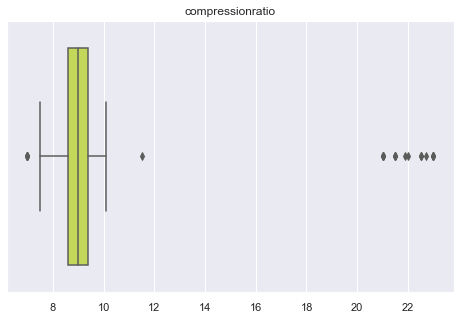

The meadian is:  95.0


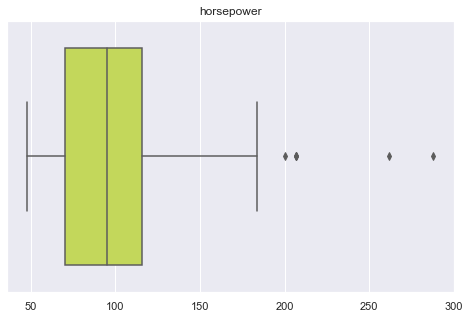

The meadian is:  5200.0


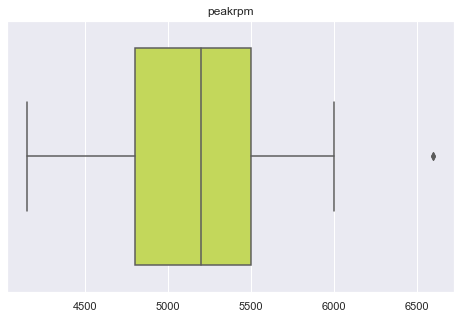

The meadian is:  24.0


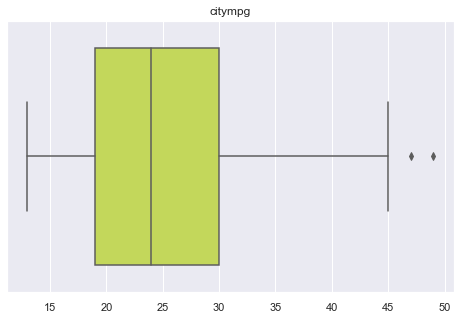

The meadian is:  30.0


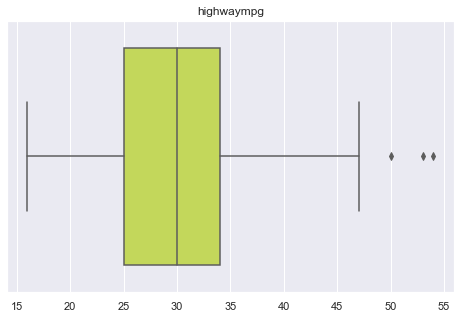

The meadian is:  10295.0


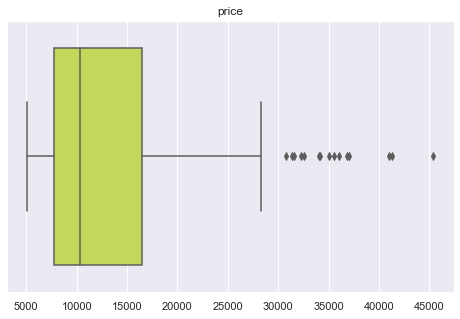

In [47]:
# Example 10 - Investigating the distribution of all Numerical values

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in n_variables:    
    x = raw_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', raw_data[c].median())
    plt.title(c)
    plt.show()

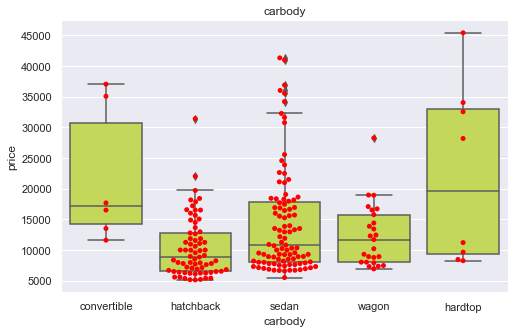

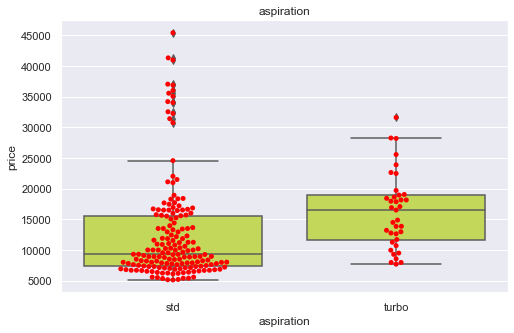

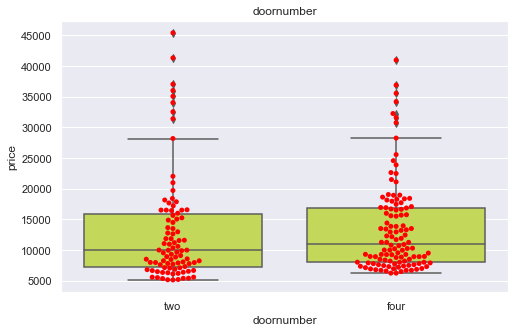

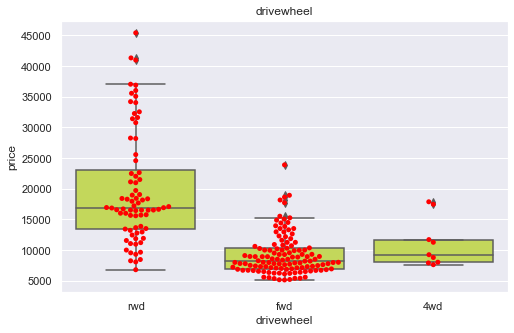

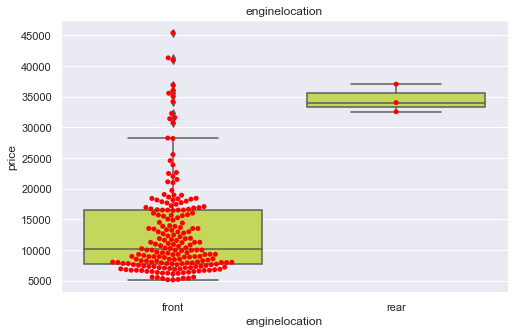

C:\Users\pitsi\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


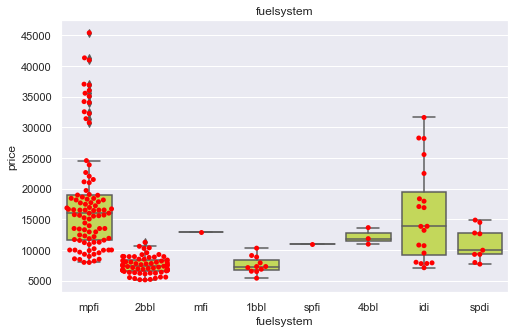

C:\Users\pitsi\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


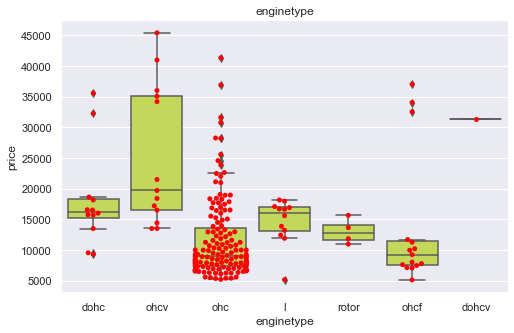

C:\Users\pitsi\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


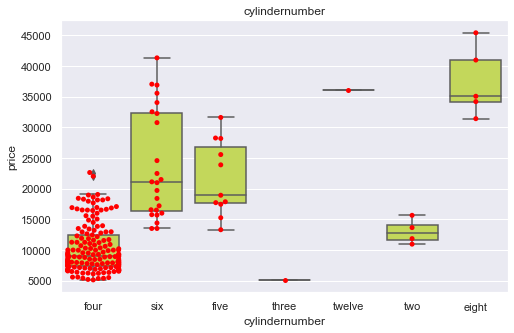

In [48]:
# Example 11 - Investigating the distribution of price by categorical variables - by data points

categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    ax = sns.boxplot(x=c, y="price", data=raw_data, color = '#D1EC46')
    ax = sns.swarmplot(x=c, y="price", data=raw_data, color="red")
    plt.title(c)
    plt.show()

## 5.7. Converting the categorical values into numerical representation

In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [50]:
raw_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [8]:
raw_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [3]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_raw_data.head()

car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight cylindernumber  enginesize  boreratio  \
0      64.1       48.8        2548           four         130       3.47   
1      64.1       48.8        2548           four         130       3.47   
2      65.5       52.4        2823            six         152       2.68   
3      66.2       54.3        2337           four         109       3.19   
4      66.4       54.3        2824           five         136       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  carbody_convertible  carbody_hardtop  carbody_hatchback  \
0  13495.0                    1                0                  0   
1  16500.0                    1                0                  0   
2  16500.0                    0                0                  1   
3  13950.0                    0                0                  0   
4  17450.0                    0                0                  0   

   carbody_sedan  carbody_wagon  aspiration_std  aspiration_turbo  \
0              0              0               1                 0   
1              0              0               1                 0   
2              0              0               1                 0   
3              1              0               1                 0   
4              1              0               1                 0   

   doornumber_four  doornumber_two  drivewheel_4wd  drivewheel_fwd  \
0                0               1               0               0   
1                0               1               0               0   
2                0               1               0               0   
3                1               0               0               1   
4                1               0               1               0   

   drivewheel_rwd  enginelocation_front  enginelocation_rear  fuelsystem_1bbl  \
0               1                     1                    0                0   
1               1                     1                    0                0   
2               1                     1                    0                0   
3               0                     1                    0                0   
4               0                     1                    0                0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  enginetype_dohc  \
0                1                0                0                1   
1                1                0                0                1   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  enginet

In [9]:
# Making categorical variables into numeric representation

new_raw_data.loc[new_raw_data['cylindernumber'] == 'two', 'cylindernumber'] = 2
new_raw_data.loc[new_raw_data['cylindernumber'] == 'three', 'cylindernumber']  = 3
new_raw_data.loc[new_raw_data['cylindernumber'] == 'four', 'cylindernumber']  = 4
new_raw_data.loc[new_raw_data['cylindernumber'] == 'five', 'cylindernumber']  = 5
new_raw_data.loc[new_raw_data['cylindernumber'] == 'six', 'cylindernumber']  = 6
new_raw_data.loc[new_raw_data['cylindernumber'] == 'eight', 'cylindernumber'] = 8
new_raw_data.loc[new_raw_data['cylindernumber'] == 'twelve', 'cylindernumber']  = 12
new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].astype(int)

# Challenge!
Write the above code in a more "pythonic" way.

In [12]:
#solution 1
cylinder_mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

for cylinder_name, cylinder_value in cylinder_mapping.items():
    new_raw_data.loc[new_raw_data['cylindernumber'] == cylinder_name, 'cylindernumber'] = cylinder_value

In [4]:
# solution 2
cylinder_mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].map(cylinder_mapping)

In [5]:
new_raw_data.head(10)

car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   
5       6          2                  audi fox       99.8      177.3   
6       7          1                audi 100ls      105.8      192.7   
7       8          1                 audi 5000      105.8      192.7   
8       9          1                 audi 4000      105.8      192.7   
9      10          0       audi 5000s (diesel)       99.5      178.2   

   carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio  \
0      64.1       48.8        2548               4         130       3.47   
1      64.1       48.8        2548               4         130       3.47   
2      65.5       52.4        2823               6         152       2.68   
3      66.2       54.3        2337               4         109       3.19   
4      66.4       54.3        2824               5         136       3.19   
5      66.3       53.1        2507               5         136       3.19   
6      71.4       55.7        2844               5         136       3.19   
7      71.4       55.7        2954               5         136       3.19   
8      71.4       55.9        3086               5         131       3.13   
9      67.9       52.0        3053               5         131       3.13   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   
5    3.40               8.5         110     5500       19          25   
6    3.40               8.5         110     5500       19          25   
7    3.40               8.5         110     5500       19          25   
8    3.40               8.3         140     5500       17          20   
9    3.40               7.0         160     5500       16          22   

       price  carbody_convertible  carbody_hardtop  carbody_hatchback  \
0  13495.000                    1                0                  0   
1  16500.000                    1                0                  0   
2  16500.000                    0                0                  1   
3  13950.000                    0                0                  0   
4  17450.000                    0                0                  0   
5  15250.000                    0                0                  0   
6  17710.000                    0                0                  0   
7  18920.000                    0                0                  0   
8  23875.000                    0                0                  0   
9  17859.167                    0                0                  1   

   carbody_sedan  carbody_wagon  aspiration_std  aspiration_turbo  \
0              0              0               1                 0   
1              0              0               1                 0   
2              0              0               1                 0   
3              1              0               1                 0   
4              1              0               1                 0   
5              1              0               1                 0   
6              1              0               1                 0   
7              0              1               1                 0   
8              1              0               0                 1   
9              0              0               0                 

In [29]:
new_raw_data['CarName'].nunique()

147

In [37]:
new_raw_data['CarName'].str.split(" ", expand=True)[0].nunique()

28

In [30]:
len(new_raw_data)

205

In [6]:
# droping columns we don't need
del new_raw_data['car_ID']
del new_raw_data['CarName']

### Heatmap

- First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
- .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
- The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
- More Info here: https://statisticsbyjim.com/basics/correlations/

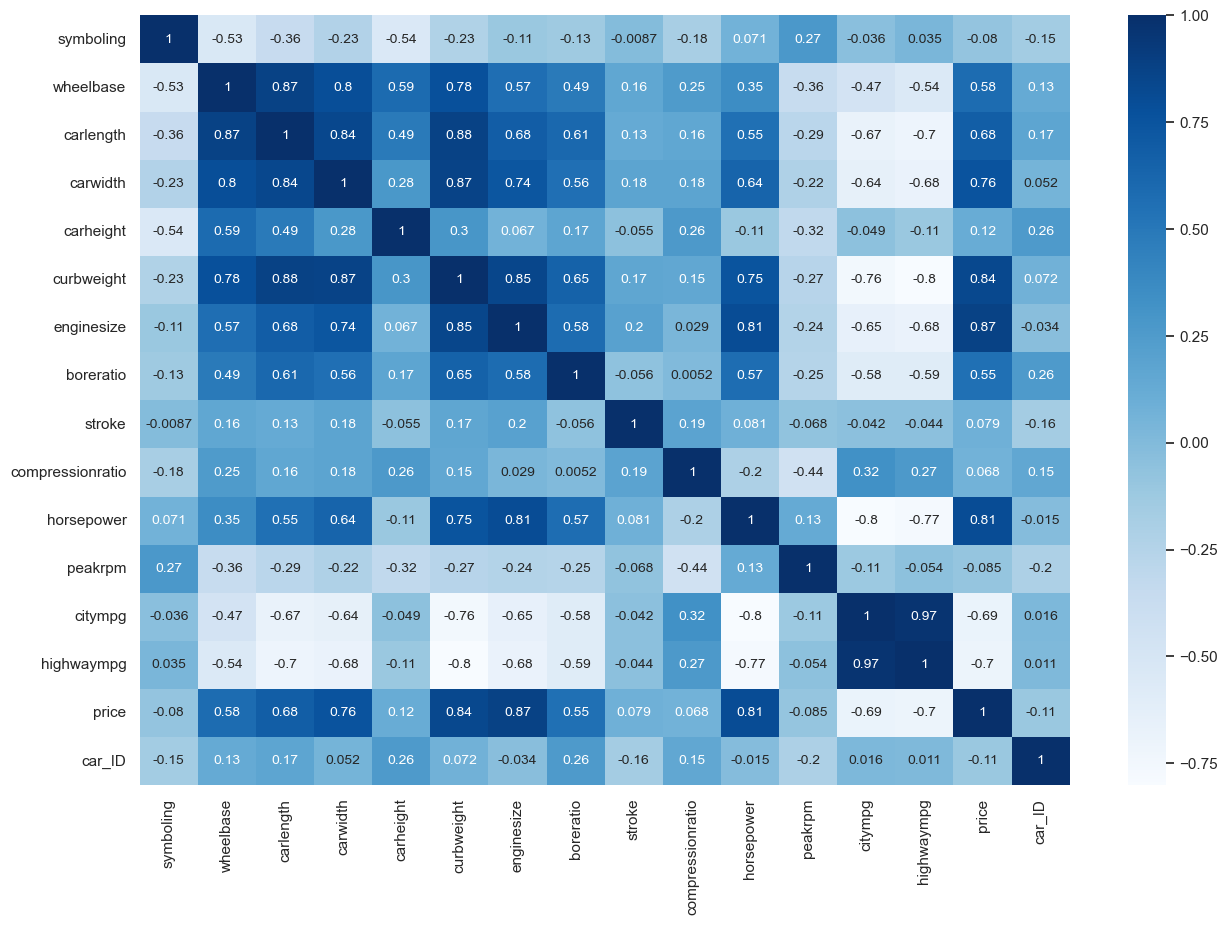

In [21]:
# Example 12 - Heatmap 

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'car_ID']

pc = new_raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [ ]:
#multi-collinearity

## 6. Splitting the Raw Data

In [7]:
# Split the data into X & y

X = new_raw_data.drop(['price'], axis = 1)
X_columns = new_raw_data.drop(['price'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

(205, 46)
(205,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(164, 46)
(41, 46)
(164,)
(41,)


## 7. What is Linear Regression Analysis
- Linear regression is a widely used machine learning model that predicts continues numbers as outputs; not classes
- It models the relationship of 2 plus variables by fitting a linear equation to observed data
- In linear regression you have 1 dependent variable (y) and 1 plus independent variables (X)
- Before you attempt to model the data, you should check if there is a relationship between the variables first; a good way is to use a scatterplot to visualise the data

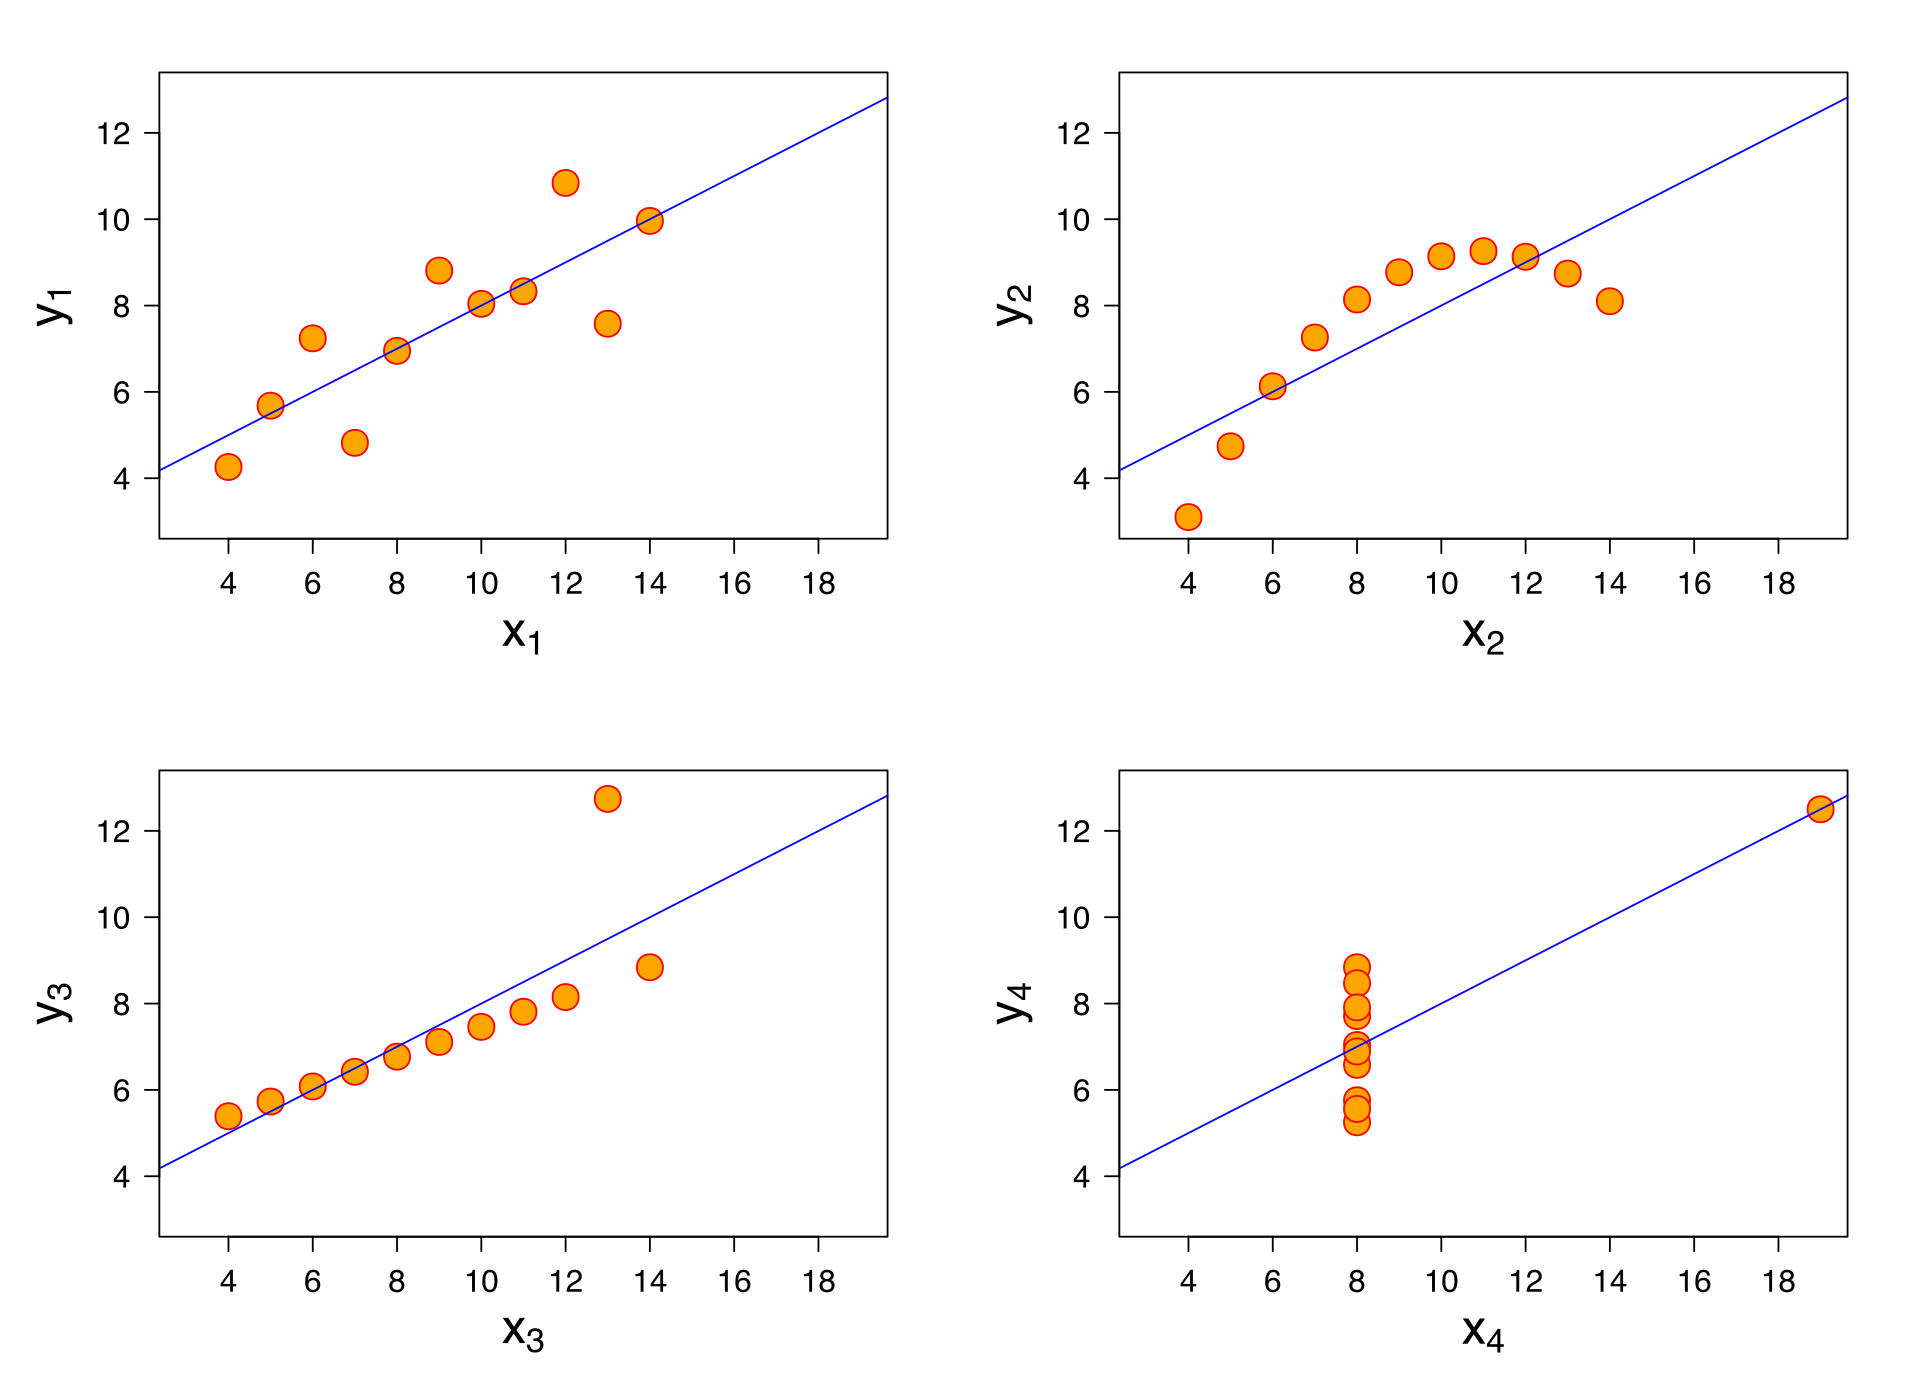

In [92]:
### Graphical Anscombe's_quartet

# Image(filename = "Anscombe's_quartet.png", width=900, height=900)

# identical descriptive statistics
# identical mean, std, variances, correlations, and regression lines

## What is Linear Regression Analysis (continued)
- A measurement of the relationship between 2 variables is the correlation coefficient; ranging from -1 to 1; the closer to 1 or -1, the stronger the relationship

- However, even if there seems to be a relationship, you should always be careful when modelling the relationship between 2 variables as correlation is not causation. For example, the rise of temperature vs Revenue.. (ice cream example)

- The mathematical equation of linear regression is Y = a + bX; where X is the independent variable and Y is the dependent variable. ‘b’ is the slope of the line and 'a' is the intercept; the value of y when x = 0

- The most common cost function used in linear regression is the “Least Squared Errors” function; which is the sum of squared errors (sum(y actuals – y predicted) ^ 2) over the training set; trying to minimize how far off the predictions are from the actuals.

- To calculate the “Least Squared Errors” firstly you must calculate the difference of the actual (y) vs the p(y); this is called the residuals.

- In order to find the least squared error you will have to find the optimal parameter values (b) that minimize the sum ‘S’ of squared residuals

# 8. Running Linear Regression

In [80]:
# Training the Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
# SK-Learn official doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [81]:
# Model Accuracy on training dataset

print('R2  on the training dataset prediction is: ',r2_score(y_train,y_pred) )   
# Model Accuracy on testing dataset
print('R2  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)


# R2 Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# MAE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

R2  on the training dataset prediction is:  0.9318255662222911
R2  on the testing dataset is:  0.8247350935155606

RMSE  on the training dataset is:  2055.199602330757
RMSE  on the testing dataset is:  3495.5687090715433

MAE  on the training dataset is:  1502.1342445911987
MAE  on the testing dataset is:  2418.2598196477616

Coefficients:  [375.223403 49.980585 -39.598371 583.472001 231.003268 4.727986
 -1719.351425 202.278843 -9761.603504 -6363.456916 -1216.264785 17.534555
 2.980697 -20.605172 171.139044 3157.357052 -2275.384940 -37.689427
 369.534191 -1213.816876 -492.821176 492.821176 124.412268 -124.412268
 -676.682688 -751.176719 1427.859408 -3653.529908 3653.529908 -667.939974
 689.659364 226.247529 5729.711799 -3072.010748 527.200669 -2775.442830
 -657.425810 -2789.433258 3283.250551 -2975.335571 1267.351716 1747.692867
 -6929.471245 6395.944940 5729.711799 -5729.711799]

Intercept:  -15425.758718605528


In [28]:
new_raw_data.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   cylindernumber  enginesize  boreratio  stroke  compressionratio  \
0               4         130       3.47    2.68               9.0   
1               4         130       3.47    2.68               9.0   
2               6         152       2.68    3.47               9.0   
3               4         109       3.19    3.40              10.0   
4               5         136       3.19    3.40               8.0   

   horsepower  peakrpm  citympg  highwaympg    price  carbody_convertible  \
0         111     5000       21          27  13495.0                    1   
1         111     5000       21          27  16500.0                    1   
2         154     5000       19          26  16500.0                    0   
3         102     5500       24          30  13950.0                    0   
4         115     5500       18          22  17450.0                    0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                0                  0              0              0   
1                0                  0              0              0   
2                0                  1              0              0   
3                0                  0              1              0   
4                0                  0              1              0   

   aspiration_std  aspiration_turbo  doornumber_four  doornumber_two  \
0               1                 0                0               1   
1               1                 0                0               1   
2               1                 0                0               1   
3               1                 0                1               0   
4               1                 0                1               0   

   drivewheel_4wd  drivewheel_fwd  drivewheel_rwd  enginelocation_front  \
0               0               0               1                     1   
1               0               0               1                     1   
2               0               0               1                     1   
3               0               1               0                     1   
4               1               0               0                     1   

   enginelocation_rear  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  enginetype_dohc  enginetype_dohcv  enginetype_l  \
0                0                1                 0             0   
1                0                1                 0             0   
2                0                0                 0             0   
3                0                0                 0             0   
4                0                0                 0             0   

   enginetype_oh

### Notes:
- The coefficient of determination ( 𝑅2 ) can be in [-1,1]. It will be 0 if you predict the mean of y for all observations.

- The R Square is measure of how close the data are to the fitted regression line.

- In this case we can say that our model explains 93% of the training data & 85% of the testing data

- The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. The RMSD represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences. These deviations are called residuals when the calculations are performed over the data sample that was used for estimation and are called errors (or prediction errors) when computed out-of-sample.

- The mean absolute error (MAE) is the average of all the absolute errors. The absolute error is the difference between the true value (y_train) and the predicted value (y_pred).

- Coeff are the weights

- The intercept is the expected mean value of Y when all X=0

In [ ]:
# R-squared

## 9. Trying Regression with important variables

Go to https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection and try a few methods.


In [ ]:
# prevent multi-collinearity
# reduce overfitting to training dataset
# simpler model

In [12]:
from sklearn.feature_selection import SelectKBest, r_regression, f_regression, mutual_info_regression


skb = SelectKBest(k=20, score_func=f_regression)
a = skb.fit_transform(X_train, y_train)


In [18]:
selected_features = X_train.columns[skb.get_support()]
selected_features

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'carbody_convertible', 'carbody_hatchback', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'fuelsystem_2bbl', 'fuelsystem_mpfi', 'enginetype_ohc',
       'enginetype_ohcv'],
      dtype='object')

In [61]:
df = pd.DataFrame((X_train.columns, skb.scores_)).T
df.columns = ['feature', 'score']
df.sort_values('score', ascending=False, inplace=True)
df

feature       score
7             enginesize  436.503772
5             curbweight  316.649329
11            horsepower  304.940842
3               carwidth   180.14466
6         cylindernumber   143.88466
13               citympg  138.064771
14            highwaympg    132.0134
2              carlength  114.369642
26        drivewheel_rwd  108.245869
8              boreratio   83.491824
25        drivewheel_fwd   83.274907
34       fuelsystem_mpfi   56.950693
1              wheelbase   55.883691
30       fuelsystem_2bbl   52.860297
27  enginelocation_front   25.520301
28   enginelocation_rear   25.520301
42       enginetype_ohcv   17.797365
17     carbody_hatchback   14.346829
40        enginetype_ohc   13.722518
15   carbody_convertible     7.74118
16       carbody_hardtop    5.648421
38      enginetype_dohcv    5.459018
20        aspiration_std    4.930391
21      aspiration_turbo    4.930391
29       fuelsystem_1bbl    4.765048
18         carbody_sedan    3.228116
37       enginetype_dohc    2.636012
45          fueltype_gas    2.411424
32        fuelsystem_idi    2.411424
44       fueltype_diesel    2.411424
10      compressionratio    1.477191
24        drivewheel_4wd    1.227902
4              carheight    0.859643
35       fuelsystem_spdi    0.782835
9                 stroke     0.65631
0              symboling    0.413258
23        doornumber_two    0.168618
22       doornumber_four    0.168618
41       enginetype_ohcf     0.13223
39          enginetype_l    0.080266
36       fuelsystem_spfi    0.078223
31       fuelsystem_4bbl    0.060129
19         carbody_wagon    0.043023
12               peakrpm    0.030433
43      enginetype_rotor    0.003632
33        fuelsystem_mfi    0.001365

In [19]:
# Split the data into X & y

X2 = new_raw_data[selected_features]

# Hold-out validation
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train2, y_train2)

y_pred = lm2.predict(X_train2)


# Model Accuracy on testing dataset
print('R2 on the training dataset is: ', lm2.score(X_train2, y_train2) )
print('R2 on the testing dataset is: ', lm2.score(X_test2, y_test2) )
print('RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test2))))
print('MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test2)))

(205, 46)
(205,)
R2 on the training dataset is:  0.8790212356317194
R2 on the testing dataset is:  0.8849043788361163
RMSE  on the testing dataset is:  2832.6946407046044
MAE  on the testing dataset is:  1928.0061212397356


## 10. Recursive feature elimination

In [83]:
# with Linear Regression

from sklearn.feature_selection import RFE

rfe_lr = RFE(lm, n_features_to_select=20, step=1)
rfe_lr = rfe_lr.fit(X_train, y_train)

print('The Chosen features by RFE:', X_train.columns[rfe_lr.support_])

# more info: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

The Chosen features by RFE: Index(['carwidth', 'cylindernumber', 'boreratio', 'stroke', 'compressionratio',
       'carbody_convertible', 'carbody_hardtop', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_spdi', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fueltype_diesel', 'fueltype_gas'],
      dtype='object')


In [84]:

# Model Accuracy on testing dataset
print('R2  on the testing dataset is: ', rfe_lr.score(X_test, y_test) )
print('RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, rfe_lr.predict(X_test))))
print('MAE  on the testing dataset is: ',mean_absolute_error(y_test, rfe_lr.predict(X_test)))

R2  on the testing dataset is:  0.8466057760417707
RMSE  on the testing dataset is:  3270.2041372137633
MAE  on the testing dataset is:  2217.3772789105747


### More info on feature selection: https://scikit-learn.org/stable/modules/feature_selection.html

# 11. Trying other models

## 11.1. Random Forest

In [89]:
from sklearn.ensemble import RandomForestRegressor

# ensembling - bagging
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)


# Model Accuracy on testing dataset
print('R2 on the training dataset is: ', rf.score(X_train, y_train) )
print('R2 on the testing dataset is: ', rf.score(X_test, y_test) )
print('RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,rf.predict(X_test))))
print('MAE  on the testing dataset is: ',mean_absolute_error(y_test,rf.predict(X_test)))

# doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

R2 on the training dataset is:  0.9870606337351766
R2 on the testing dataset is:  0.9409812313401109
RMSE  on the testing dataset is:  2028.4552564469136
MAE  on the testing dataset is:  1271.2160569105688


In [93]:
from sklearn.ensemble import RandomForestRegressor

# ensembling - bagging
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train2, y_train2)

y_pred = rf.predict(X_train2)


# Model Accuracy on testing dataset
print('R2 on the training dataset is: ', rf.score(X_train2, y_train2) )
print('R2 on the testing dataset is: ', rf.score(X_test2, y_test2) )
print('RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test2,rf.predict(X_test2))))
print('MAE  on the testing dataset is: ',mean_absolute_error(y_test,rf.predict(X_test2)))

# doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

R2 on the training dataset is:  0.9872824217782601
R2 on the testing dataset is:  0.942014474575093
RMSE  on the testing dataset is:  2010.620742976072
MAE  on the testing dataset is:  1304.3367276422764


In [90]:
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versioncha

In [91]:
# Optimizing Random Forest R

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 20, 40],
    'max_features': [5, 10, 20],
    # 'min_samples_leaf': [3, 4, 5],
    # 'min_samples_split': [8, 10, 12],
    'n_estimators': [25, 50, 100]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 4, n_jobs = -1, verbose = 1)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 4 folds for each of 36 candidates, totalling 144 fits


{'max_depth': 10, 'max_features': 10, 'n_estimators': 100}

In [56]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=20, max_features=10, n_estimators=50,
                      random_state=0)

In [92]:

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_train)

# Model Accuracy on testing dataset
print('R2 on the testing dataset is: ', best_rf.score(X_test, y_test) )
print('RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, best_rf.predict(X_test))))
print('MAE  on the testing dataset is: ',mean_absolute_error(y_test, best_rf.predict(X_test)))


R2 on the testing dataset is:  0.9409233521058866
RMSE  on the testing dataset is:  2029.44965762665
MAE  on the testing dataset is:  1287.4324453202946


## 11.2.Gradient Boosting and XGBoost Regressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# Model Accuracy on testing dataset
print('R2  on the testing dataset is: ', reg.score(X_test, y_test) )
print('RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('MAE  on the testing dataset is: ',mean_absolute_error(y_test,reg.predict(X_test)))


# doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

The Accuracy  on the testing dataset is:  0.944538667933968
The RMSE  on the testing dataset is:  1966.3712165085378
The MAE  on the testing dataset is:  1374.4676099853177


### Installing xgboost library

Install the library via conda. Please read the doc: https://xgboost.readthedocs.io/en/stable/install.html


In [68]:
# optimizing XGBoost Regressor

import xgboost as xgb

params = { 'max_depth': [5,10,20],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [25, 50, 100],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 0)

xgbr_cv = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   #scoring='neg_mean_squared_error', 
                   verbose=1,
                   cv = 4, n_jobs = -1)

xgbr_cv.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
# grid search doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Fitting 4 folds for each of 54 candidates, totalling 216 fits


Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100}


In [67]:
xgbr_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 10,
 'n_estimators': 100}

In [69]:
# Training the model on best parameters

xgbr = xgb.XGBRegressor(**xgbr_cv.best_params_)
xgbr.fit(X_train, y_train)
xgbr

y_pred = xgbr.predict(X_train)
# Model Accuracy on testing dataset
print('R2  on the testing dataset is: ', xgbr.score(X_test, y_test) )
print('RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,xgbr.predict(X_test))))
print('MAE  on the testing dataset is: ',mean_absolute_error(y_test,xgbr.predict(X_test)))


R2  on the testing dataset is:  0.9422539191686427
RMSE  on the testing dataset is:  2006.4651343415178
MAE  on the testing dataset is:  1216.4618187881097


## 11.3. Support Vector Regressor

In [19]:
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

regr = SVR()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)
# Model Accuracy on testing dataset
print('R2  on the testing dataset is: ', regr.score(X_test, y_test) )
print('RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

R2  on the testing dataset is:  -0.13428309188741405
RMSE  on the testing dataset is:  8892.647746970628
MAE  on the testing dataset is:  5717.203599990168


In [20]:
# Optimising SVR

hyperparameter_space = {
    "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'], 
    "gamma" : ['scale', 'auto'],
    'C': [0.001, 0.05, 0.1]
}

regr = SVR()

svr_cv = GridSearchCV(regr, hyperparameter_space, n_jobs=-1, cv=4)
svr_cv.fit(X_train, y_train)

print("Best parameters:", svr_cv.best_params_)

In [ ]:
print("Best parameters:", svr_cv.best_params_)

In [ ]:
# Training the model on best parameters

regr = SVR(**svr_cv.best_params_)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)
# Model Accuracy on testing dataset
print('R2 on the testing dataset is: ', regr.score(X_test, y_test) )
print('RMSE on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('MAE on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

### Checking whether the best SVR is overfitted

In [ ]:
#How?

### Plotting Actuals Vs Predicted

C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

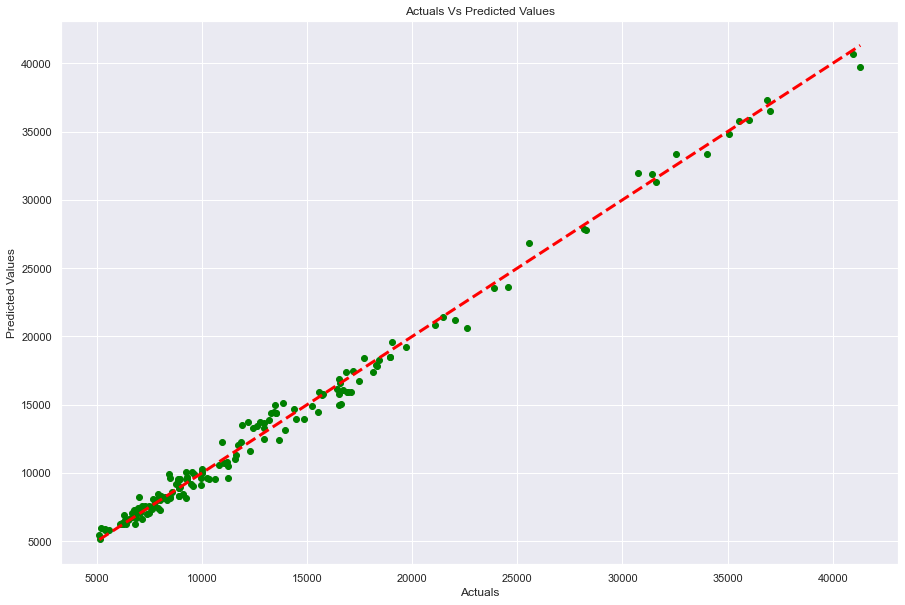

In [119]:
plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# increase size